In [1]:
import numpy as np
import scdrs
import scanpy as sc
import pandas as pd
import os

In [2]:
# Load scRNA data (just raw counts)
rpca_int_adata_raw = sc.read_h5ad("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/whole_ref_scRNA_files/rpca_int_raw_data.h5ad")
rpca_int_adata_raw

AnnData object with n_obs × n_vars = 118578 × 23414
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'features'

In [ ]:
# Munge gene sets from MAGMA (CAD MVP EUR meta)
!scdrs munge-gs --out-file ./CAD_GWAS_MVP_EUR_meta_pval.gs --pval-file ./CAD_GWAS_MVP_EUR_meta_pval.tsv --weight zscore --n-max 1000
!scdrs munge-gs --out-file ./CAD_GWAS_MVP_EUR_meta_zscores.gs --zscore-file ./CAD_GWAS_MVP_EUR_meta_zscores.tsv --weight zscore --n-max 1000

# Munge gene sets from MAGMA (White Blood Cell count)
!scdrs munge-gs --out-file ./WBC_count_pval.gs --pval-file WBC_count_pval.tsv --weight zscore --n-max 1000
!scdrs munge-gs --out-file ./WBC_count_zscores.gs --zscore-file ./WBC_count_zscores.tsv --weight zscore --n-max 1000

# Munge gene sets from MAGMA (Alzheimer disease)
!scdrs munge-gs --out-file Alzheimer_disease_MAGMA_pval.gs --pval-file Alzheimer_disease_MAGMA_pval.tsv --weight zscore --n-max 1000
!scdrs munge-gs --out-file Alzheimer_disease_MAGMA_zscores.gs --zscore-file Alzheimer_disease_MAGMA_zscores.tsv --weight zscore --n-max 1000


In [3]:
# Load covariate file for sex, arterial origin and sample disease status
cov_file = pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/categorical_covariate_file.cov", sep="\t")
cov_file

,sex,arterial_origin,sample_disease_status
AAACCCACAAAGGATT_1,males,carotid,lesion
AAACCCAGTCACCACG_1,males,carotid,lesion
AAACCCAGTGTGTGGA_1,males,carotid,lesion
AAACCCATCTTGGTCC_1,males,carotid,lesion
AAACGAAAGATGTAGT_1,males,carotid,lesion
...,...,...,...
TTTGTCAGTACTCAAC-1_15,females,coronary,non_lesion
TTTGTCAGTCTTGATG-1_15,females,coronary,non_lesion
TTTGTCAGTGAAAGAG-1_15,females,coronary,non_lesion
TTTGTCAGTTAAGACA-1_15,females,coronary,non_lesion


In [5]:
# Run scdrs compute-score cli interface to evaluate disease enrichment with single cell resolution (CAD MVP EUR meta)
!scdrs compute-score --h5ad-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/whole_ref_scRNA_files/rpca_int_raw_data.h5ad  \
--h5ad-species human \
--gs-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_pilot/magma_gene_sets/CAD_MVP_EUR_meta/CAD_GWAS_MVP_EUR_meta_zscores.gs  \
--cov-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/categorical_covariate_file.cov \
--gs-species human \
--out-folder /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/CAD_MVP_EUR_meta/ \
--flag-filter-data False \
--n-ctrl 250

******************************************************************************
* Single-cell disease relevance score (scDRS)
* Version 1.0.2
* Martin Jinye Zhang and Kangcheng Hou
* HSPH / Broad Institute / UCLA
* MIT License
******************************************************************************
Call: scdrs compute-score \
--h5ad-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/whole_ref_scRNA_files/rpca_int_raw_data.h5ad \
--h5ad-species human \
--cov-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/categorical_covariate_file.cov \
--gs-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_pilot/magma_gene_sets/CAD_MVP_EUR_meta/CAD_GWAS_MVP_EUR_meta_zscores.gs \
--gs-species human \
--ctrl-match-opt mean_var \
--weight-opt vs \
--adj-prop None \
--flag-filter-data False \
--flag-raw-count True \
--n-ctrl 250 \
--flag-return-ctrl-raw-score False \
--flag-return-ctrl-norm-score True \
--out-folder /pr

In [6]:
# Run scdrs compute-score cli interface to evaluate disease enrichment with single cell resolution (WBC count)
!scdrs compute-score --h5ad-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/whole_ref_scRNA_files/rpca_int_raw_data.h5ad  \
--h5ad-species human \
--gs-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_pilot/magma_gene_sets/White_Blood_Cell_count/WBC_count_zscores.gs  \
--cov-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/categorical_covariate_file.cov \
--gs-species human \
--out-folder /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/WBC_count/ \
--flag-filter-data False \
--n-ctrl 250

******************************************************************************
* Single-cell disease relevance score (scDRS)
* Version 1.0.2
* Martin Jinye Zhang and Kangcheng Hou
* HSPH / Broad Institute / UCLA
* MIT License
******************************************************************************
Call: scdrs compute-score \
--h5ad-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/whole_ref_scRNA_files/rpca_int_raw_data.h5ad \
--h5ad-species human \
--cov-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/categorical_covariate_file.cov \
--gs-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_pilot/magma_gene_sets/White_Blood_Cell_count/WBC_count_zscores.gs \
--gs-species human \
--ctrl-match-opt mean_var \
--weight-opt vs \
--adj-prop None \
--flag-filter-data False \
--flag-raw-count True \
--n-ctrl 250 \
--flag-return-ctrl-raw-score False \
--flag-return-ctrl-norm-score True \
--out-folder /project/

In [7]:
# Run scdrs compute-score cli interface to evaluate disease enrichment with single cell resolution (Alzheimer's disease)
!scdrs compute-score --h5ad-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/whole_ref_scRNA_files/rpca_int_raw_data.h5ad  \
--h5ad-species human \
--gs-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_pilot/magma_gene_sets/Alzheimer_disease/Alzheimer_disease_MAGMA_zscores.gs  \
--cov-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/categorical_covariate_file.cov \
--gs-species human \
--out-folder /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/Alzheimer_disease/ \
--flag-filter-data False \
--n-ctrl 250

******************************************************************************
* Single-cell disease relevance score (scDRS)
* Version 1.0.2
* Martin Jinye Zhang and Kangcheng Hou
* HSPH / Broad Institute / UCLA
* MIT License
******************************************************************************
Call: scdrs compute-score \
--h5ad-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/whole_ref_scRNA_files/rpca_int_raw_data.h5ad \
--h5ad-species human \
--cov-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/categorical_covariate_file.cov \
--gs-file /project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_pilot/magma_gene_sets/Alzheimer_disease/Alzheimer_disease_MAGMA_zscores.gs \
--gs-species human \
--ctrl-match-opt mean_var \
--weight-opt vs \
--adj-prop None \
--flag-filter-data False \
--flag-raw-count True \
--n-ctrl 250 \
--flag-return-ctrl-raw-score False \
--flag-return-ctrl-norm-score True \
--out-folder 

In [6]:
# Load scRNA data (including normalized), just for plottin purposes
rpca_int_sct_adata = sc.read_h5ad("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/whole_ref_scRNA_files/rpca_int_sct_v3_1_RNA_assay.h5ad")
rpca_int_sct_adata

AnnData object with n_obs × n_vars = 118578 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'study', 'percent.mt', 'percent.hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'SCT_snn_res.1', 'SCT_snn_res.0.9', 'SCT_snn_res.0.8', 'integrated_snn_res.1.2', 'arterial_origin', 'sample_disease_status', 'integrated_snn_res.1', 'integrated_snn_res.0.9', 'TS_vasc_predicted_id', 'TS_vasc_prediction_score_max', 'TS_immune_predicted_id', 'TS_immune_prediction_score_max', 'level1_annotations', 'celltypist_Immune_All_Low', 'celltypist_Immune_All_Low_mvoting', 'celltypist_Immune_All_AddPIP', 'celltypist_Immune_All_AddPIP_mvoting', 'level2_annotations', 'updated_level2_annotations', 'sex'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_umap'

/home/jev4xy/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/jev4xy/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample' as categorical
/home/jev4xy/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories wi

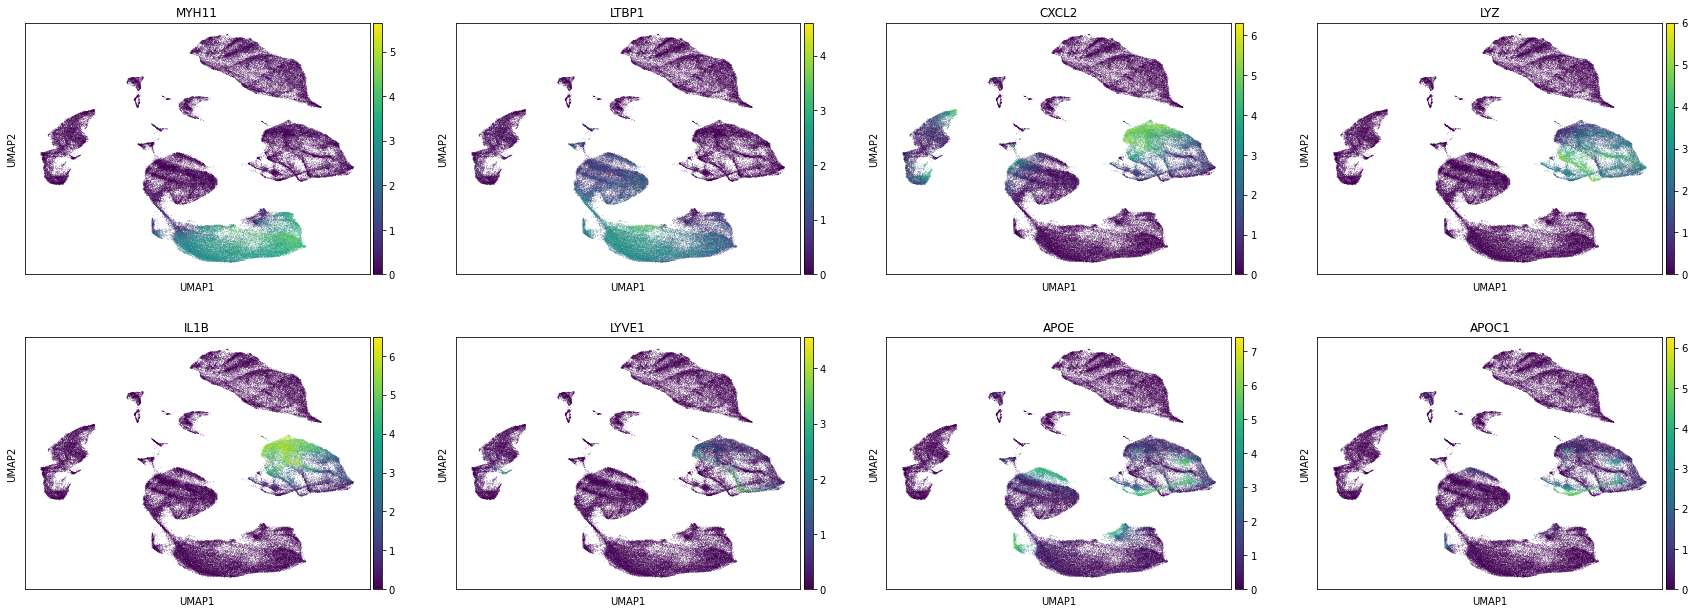

In [6]:
# Make sure we can use some of scanpy basic functions in the converted data and nothing looks odd
sc.pl.umap(rpca_int_sct_adata, color=["MYH11", "LTBP1", "CXCL2", "LYZ", "IL1B", "LYVE1", "APOE", "APOC1"])

In [7]:
# Overlay computed scDRS scores on UMAP embeddings
dict_score = {"CAD_van_der_Harst": pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/CAD_van_der_Harst/CAD_van_der_Harst.full_score.gz",
                                            sep="\t", index_col=0),
             "CAD_MVP_EUR_meta": pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/CAD_MVP_EUR_meta/CAD_MVP_EUR_meta.full_score.gz",
                                            sep="\t", index_col=0),
              "MI": pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/MI/MI.full_score.gz",
                                            sep="\t", index_col=0),
             "WBC_count": pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/WBC_count/White_Blood_Cell_count.full_score.gz",
                                            sep="\t", index_col=0),
             "Alzheimer_disease": pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/Alzheimer_disease/Alzheimer_disease.full_score.gz",
                                            sep="\t", index_col=0),
             "Carotid_plaque": pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/Carotid_plaque/Carotid_Plaque.full_score.gz",
                                            sep="\t", index_col=0)}

# Add normalized scores for each trait into the scRNA seq metadata
for trait in dict_score:
    rpca_int_sct_adata.obs[trait] = dict_score[trait]["norm_score"]
    

In [56]:
# Overlay computed scDRS scores on UMAP embeddings
dict_score = {"CAD_MVP_EUR_meta": pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/CAD_MVP_EUR_meta/CAD_MVP_EUR_meta.full_score.gz",
                                            sep="\t", index_col=0),
              "WBC_count": pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/WBC_count/White_Blood_Cell_count.full_score.gz",
                                            sep="\t", index_col=0),
              "Alzheimer_disease": pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/scDRS_analyses/scDRS_out_scores/Alzheimer_disease/Alzheimer_disease.full_score.gz",
                                            sep="\t", index_col=0)}

# Add normalized scores for each trait into the scRNA seq metadata
for trait in dict_score:
    rpca_int_sct_adata.obs[trait] = dict_score[trait]["norm_score"]

array([[<AxesSubplot:title={'center':'pval'}>,
        <AxesSubplot:title={'center':'raw_score'}>],
       [<AxesSubplot:title={'center':'norm_score'}>, <AxesSubplot:>]],
      dtype=object)

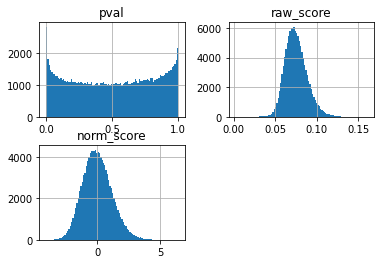

In [34]:
cad_res = dict_score["CAD_MVP_EUR_meta"]
cad_res[["pval", "raw_score", "norm_score"]].hist(bins=100)

array([[<AxesSubplot:title={'center':'pval'}>,
        <AxesSubplot:title={'center':'raw_score'}>],
       [<AxesSubplot:title={'center':'norm_score'}>, <AxesSubplot:>]],
      dtype=object)

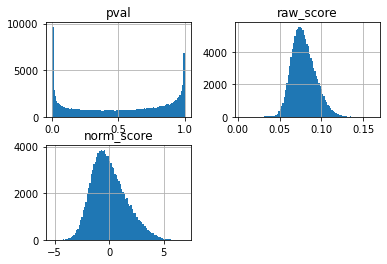

In [27]:
wbc_res = dict_score["WBC_count"]
wbc_res[["pval", "raw_score", "norm_score"]].hist(bins=100)

array([[<AxesSubplot:title={'center':'pval'}>,
        <AxesSubplot:title={'center':'raw_score'}>],
       [<AxesSubplot:title={'center':'norm_score'}>, <AxesSubplot:>]],
      dtype=object)

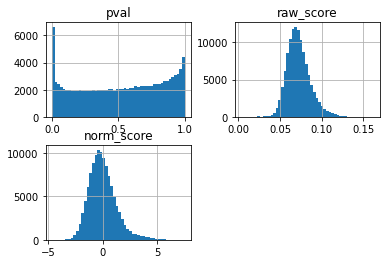

In [33]:
ad_res = dict_score["Alzheimer_disease"]
ad_res[["pval", "raw_score", "norm_score"]].hist(bins=50)

/home/jev4xy/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/jev4xy/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample' as categorical
/home/jev4xy/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories wi

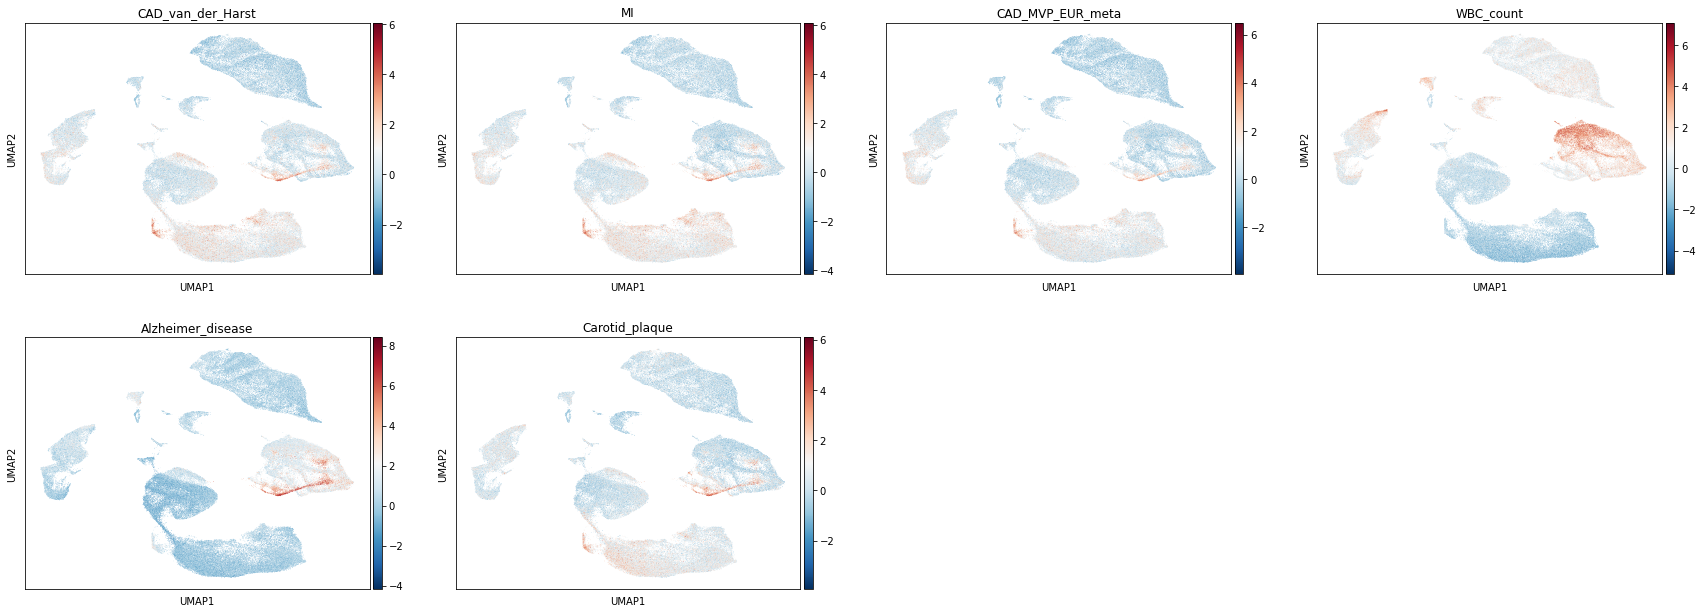

In [8]:
# Plot scDRS scores 
sc.pl.umap(rpca_int_sct_adata,
          color=["CAD_MVP_EUR_meta",
                "WBC_count",
                "Alzheimer_disease"],
          color_map="RdBu_r"
          )
